# Liver Patient Prediction Model
#By- Aarush Kumar
#Dated: August 01,2021

In [1]:
from IPython.display import Image
Image(url='https://media.istockphoto.com/photos/doctor-shows-liver-in-hand-picture-id899731774?k=6&m=899731774&s=612x612&w=0&h=VdYLA6MQXoaXZ6zO4X8jCHYxFQlZ1-Ho8mPnV4N2leg=')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("/home/aarush100616/Downloads/Projects/Liver Patient Prediction/indian_liver_patient.csv")
df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [4]:
# Looking for missing values in the dataset
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
df.shape

(583, 11)

In [6]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [7]:
df.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529        1.085451   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   60.500000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin  Albumin_and_Globulin_Ratio     Dataset  
count  583.000000                  579.000000  583.000000  
mean     3.141852                    0.947064    1.286449  
std      0.795519                    0.319592    0.452490  
min      0.900000                    0.300000    1.000000  
25%      2.600000                    0.700000    1.000000  
50%      3.100000                    0.930000    1.000000  
75%      3.800000                    1.100000    2.000000  
max      5.500000                    2.800000    2.000000

In [8]:
df.size

6413

In [9]:
# Re-naming the columns
df.rename(columns={'Dataset':'Outcome'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Outcome                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [10]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

In [11]:
df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       2              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Outcome  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [12]:
# Dropping the missing values
df = df.dropna()

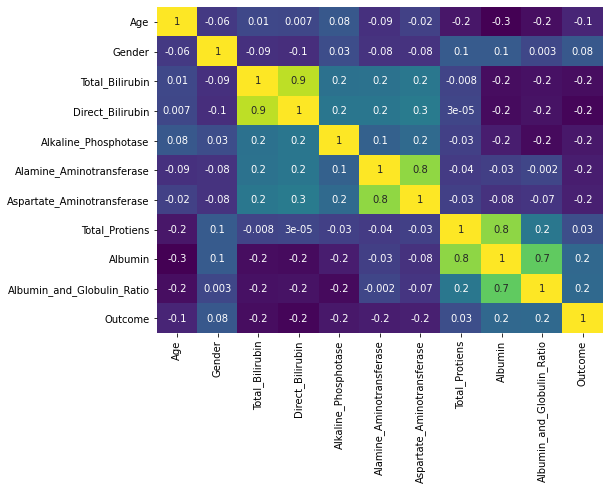

In [13]:
# Having a look at the correlation matrix
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False);

In [14]:
print ('Total Unhealthy Livers : {} '.format(df.Outcome.value_counts()[1]))
print ('Total Healthy Livers : {} '.format(df.Outcome.value_counts()[2]))

Total Unhealthy Livers : 414 
Total Healthy Livers : 165 


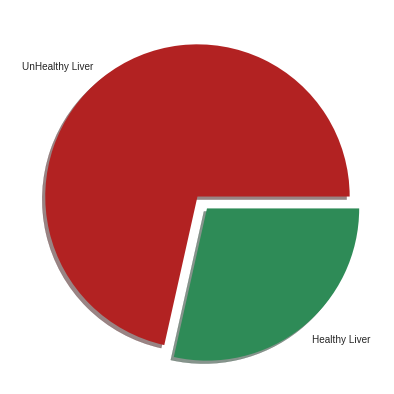

In [15]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))

plt.pie(x=df["Outcome"].value_counts(), 
        colors=["firebrick","seagreen"], 
        labels=["UnHealthy Liver","Healthy Liver"], 
        shadow = True, 
        explode = (0, 0.1)
        )

plt.show()

In [16]:
df.Gender.value_counts()

1    439
2    140
Name: Gender, dtype: int64

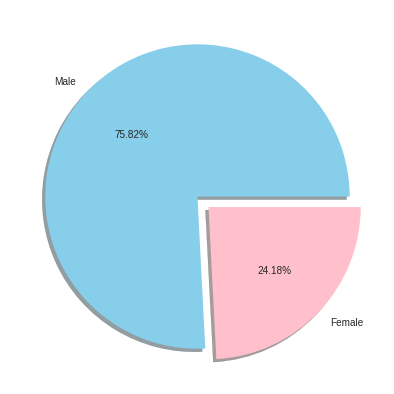

In [17]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))
plt.pie(x=df["Gender"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

In [18]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x=df["Age"], kde=True, color="seagreen");

In [19]:
fig, ax =plt.subplots(4,2, figsize=(20,25)) 
plt.style.use("seaborn")
sns.histplot(x = df["Total_Bilirubin"], hue = df["Outcome"], palette="viridis", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("Total_Bilirubin",fontsize=15)
sns.histplot(x = df["Direct_Bilirubin"], hue = df["Outcome"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("Direct_Bilirubin",fontsize=15)
sns.histplot(x = df["Alkaline_Phosphotase"], hue = df["Outcome"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("Alkaline_Phosphotase",fontsize=15)
sns.histplot(x = df["Alamine_Aminotransferase"], hue = df["Outcome"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("Alamine_Aminotransferase",fontsize=15)
sns.histplot(x = df["Aspartate_Aminotransferase"], hue = df["Outcome"], palette="flare", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("Aspartate_Aminotransferase",fontsize=15)
sns.histplot(x = df["Total_Protiens"], hue = df["Outcome"], palette="flare", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("Total_Protiens",fontsize=15)
sns.histplot(x = df["Albumin"], hue = df["Outcome"], palette="viridis", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("Albumin",fontsize=15)
sns.histplot(x = df["Albumin_and_Globulin_Ratio"], hue = df["Outcome"], palette="viridis", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("Albumin_and_Globulin_Ratio",fontsize=15);

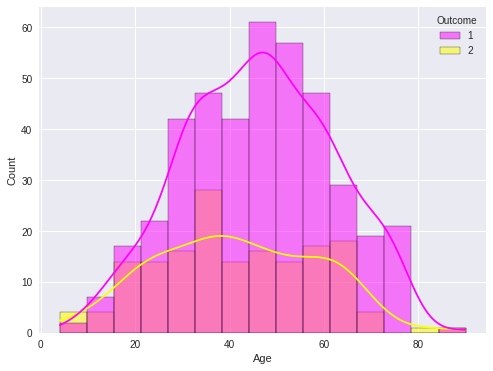

In [20]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x = df["Age"], hue = df["Outcome"], palette="spring", kde=True);

### Splitting the data into training and test datasets

In [21]:
# X data
X = df.drop("Outcome", axis=1)
X.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       2              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  
0      3.3                        0.90  
1      3.2                        0.74  
2      3.3                        0.89  
3      3.4                        1.00  
4      2.4                        0.40

In [22]:
# y data
y = df["Outcome"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Outcome, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
len(X_train), len(X_test)

(463, 116)

In [25]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [27]:
LogisticRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 65.51724137931035


In [28]:
# Having a look at the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
y_pred_lr = lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.03);

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


In [29]:
# Having a look at the classification report of Logistic Regression
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           1       0.65      0.99      0.78        73
           2       0.80      0.09      0.17        43

    accuracy                           0.66       116
   macro avg       0.72      0.54      0.47       116
weighted avg       0.70      0.66      0.55       116



## Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 65.51724137931035


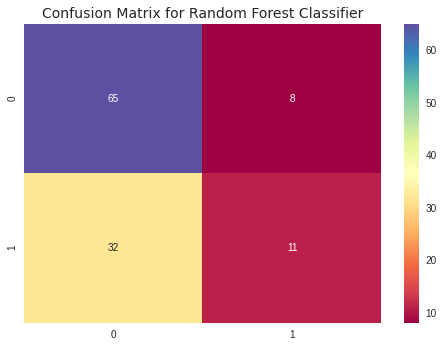

In [32]:
# Having a look at the confusion matrix
y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [33]:
# Classification report of Random Forest Classifier
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       0.67      0.89      0.76        73
           2       0.58      0.26      0.35        43

    accuracy                           0.66       116
   macro avg       0.62      0.57      0.56       116
weighted avg       0.64      0.66      0.61       116



### K Neighbors Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [35]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 63.793103448275865


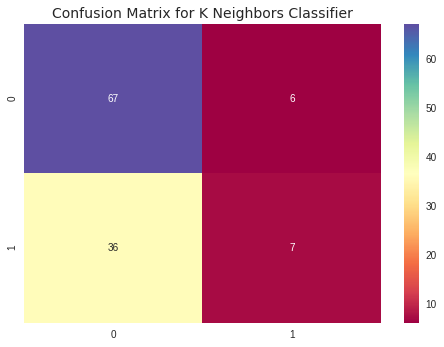

In [36]:
# Having a look at the confusion matrix
y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [37]:
# Classification report of K Neighbors Classifier
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.65      0.92      0.76        73
           2       0.54      0.16      0.25        43

    accuracy                           0.64       116
   macro avg       0.59      0.54      0.51       116
weighted avg       0.61      0.64      0.57       116



## DecisionTreeClassifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 58.620689655172406


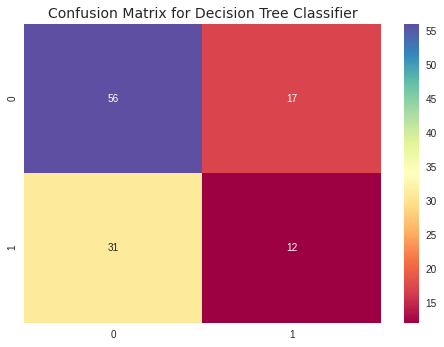

In [40]:
# Confusion matrix
y_pred_dtc = dtc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Decision Tree Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [41]:
# Classification Report of Decision Tree Classifier
print(metrics.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           1       0.64      0.77      0.70        73
           2       0.41      0.28      0.33        43

    accuracy                           0.59       116
   macro avg       0.53      0.52      0.52       116
weighted avg       0.56      0.59      0.56       116



## CatBoost Classifier

In [47]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train);

Learning rate set to 0.5
0:	learn: 0.6126495	total: 96.1ms	remaining: 865ms
1:	learn: 0.5682588	total: 101ms	remaining: 406ms
2:	learn: 0.5270400	total: 108ms	remaining: 251ms
3:	learn: 0.5020126	total: 113ms	remaining: 169ms
4:	learn: 0.4825037	total: 120ms	remaining: 120ms
5:	learn: 0.4664542	total: 125ms	remaining: 83.4ms
6:	learn: 0.4567003	total: 131ms	remaining: 56ms
7:	learn: 0.4499456	total: 137ms	remaining: 34.3ms
8:	learn: 0.4333385	total: 143ms	remaining: 15.9ms
9:	learn: 0.4281517	total: 151ms	remaining: 0us


In [48]:
CatBoostClassifierScore = cat.score(X_test,y_test)
print("Accuracy obtained by CatBoost Classifier model:",CatBoostClassifierScore*100)

Accuracy obtained by CatBoost Classifier model: 66.37931034482759


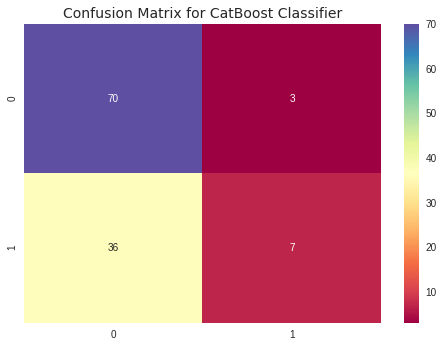

In [49]:
# Confusion matrix
y_pred_cat = cat.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for CatBoost Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [50]:
# Classification Report of CatBoost Classifier
print(metrics.classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           1       0.66      0.96      0.78        73
           2       0.70      0.16      0.26        43

    accuracy                           0.66       116
   macro avg       0.68      0.56      0.52       116
weighted avg       0.68      0.66      0.59       116



## Gradient Boosting Classifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [43]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 68.96551724137932


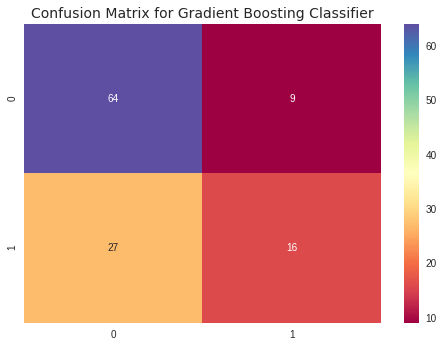

In [44]:
# Confusion matrix
y_pred_gb = gb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [45]:
# Classification Report of Gradient Boosting Classifier
print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           1       0.70      0.88      0.78        73
           2       0.64      0.37      0.47        43

    accuracy                           0.69       116
   macro avg       0.67      0.62      0.63       116
weighted avg       0.68      0.69      0.67       116



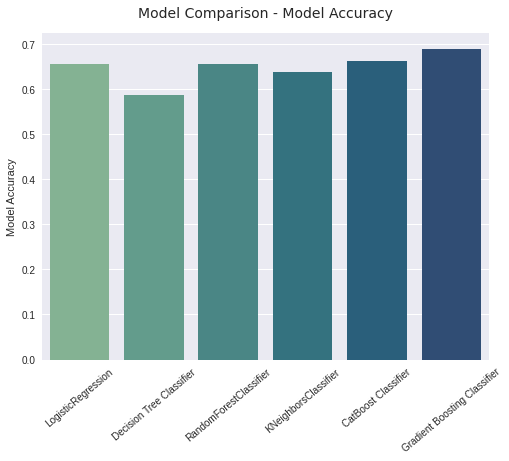

In [51]:
plt.style.use("seaborn")

x = ["LogisticRegression", 
     "Decision Tree Classifier", 
     "RandomForestClassifier", 
     "KNeighborsClassifier", 
     "CatBoost Classifier", 
     "Gradient Boosting Classifier"]

y = [LogisticRegressionScore, 
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     KNeighborsClassifierScore, 
     CatBoostClassifierScore, 
     GradientBoostingClassifierScore]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14, fontname="Helvetica", y=1.03);

## Hyperparameter Tuning on Logistic Regression¶

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
      "penalty": ["l1", "l2", "elastic", "none" ],
      "C" : np.logspace(-4, 4, 20),
      "solver" : ["sag", "saga", "lbfgs", "liblinear", "newton-cg"],
      "max_iter" : [100, 1000, 2500, 5000]
    }
]

grid_search_lr = GridSearchCV(estimator = lr, 
                              param_grid = param_grid, 
                              cv = 5, 
                              n_jobs = -1, 
                              verbose = True)

In [53]:
grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elastic', 'none'],
                          'solver': ['sag', 'saga', 'lbfgs', 'liblinear',
                                     'newton-cg']}],
             verbose=True)

In [54]:
grid_search_lr.best_params_

{'C': 29.763514416313132, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}

In [55]:
grid_search_lr.best_score_

0.7517999064983637

In [56]:
grid_search_lr_predict = grid_search_lr.predict(X_test)

In [57]:
print('Improvement in Logistic Regression after GridSearchCV: {:0.2f}%.'.format(100 * (grid_search_lr.best_score_ - LogisticRegressionScore) / LogisticRegressionScore))

Improvement in Logistic Regression after GridSearchCV: 14.75%.


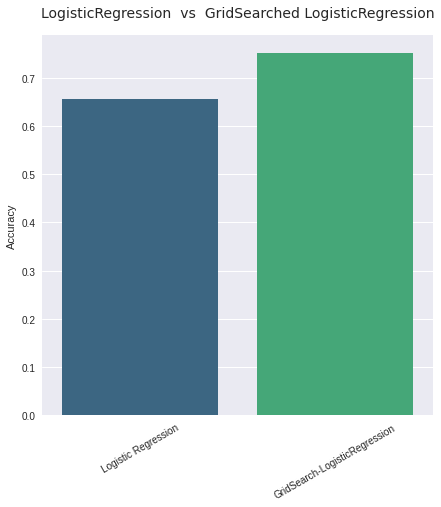

In [58]:
# Comparing the results after the improvement in Logistic Regression

plt.style.use("seaborn")

x = ["Logistic Regression",
     "GridSearch-LogisticRegression"]

y = [LogisticRegressionScore,
     grid_search_lr.best_score_]

fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x=x,y=y, palette="viridis");
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.title("LogisticRegression  vs  GridSearched LogisticRegression", fontsize=14, fontname="Helvetica", y=1.03);

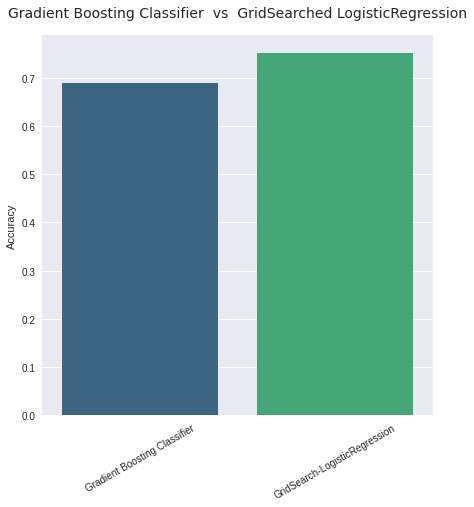

In [59]:
# Comparing the GridSearch-Logistic Regression and Gradient Boosting Classifier 

plt.style.use("seaborn")

x = ["Gradient Boosting Classifier",
     "GridSearch-LogisticRegression"]

y = [GradientBoostingClassifierScore,
     grid_search_lr.best_score_]

fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x=x,y=y, palette="viridis");
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.title("Gradient Boosting Classifier  vs  GridSearched LogisticRegression", fontsize=14, fontname="Helvetica", y=1.03);

In [60]:
# Classification Report of GridSearch-LogisticRegression
print(classification_report(y_test, grid_search_lr_predict))

              precision    recall  f1-score   support

           1       0.66      0.95      0.78        73
           2       0.67      0.19      0.29        43

    accuracy                           0.66       116
   macro avg       0.67      0.57      0.54       116
weighted avg       0.66      0.66      0.60       116

